In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import datetime

In [2]:
def mytabla(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val], axis=1)
    return mis_val_table

In [3]:
name = r"C:\Users\jibar\OneDrive - Universidad de los andes\Clases_Maestria\CIENCIA DE DATOS\Proyecto\General\General\Data\Daily.csv"

data =pd.read_csv(name,sep='|',error_bad_lines=False, warn_bad_lines= False,index_col=False,header=0, low_memory=False)

In [4]:
def eliminar_coma(x):
    x=str(x).replace(',','.')
    return x

In [5]:

data['VolUnCorrected']=data['VolUnCorrected'].apply(eliminar_coma)
data['VolCorrected']=data['VolCorrected'].apply(eliminar_coma)
data['Pressure']=data['Pressure'].apply(eliminar_coma)
data['Temperature']=data['Temperature'].apply(eliminar_coma)


convert = {'id_sitio':'object',
          'VolUnCorrected':float,
          'VolCorrected':float,
          'Pressure':float,
          'Temperature':float,
          'MaxPressure':float,
          'MinPressure':float,
          'MaxFlow':float,
          'MinFlow':float,
          'MaxTemp':float,
          'MinTemp':float,
          'id_RTU':'object'}
data = data.astype(convert)

In [6]:
selected = ['id_sitio','Daily_Date','VolUnCorrected',
       'VolCorrected', 'Pressure', 'Temperature','id_RTU']
data  = data[selected]

In [7]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [8]:
data['Daily_Date']   = pd.to_datetime(data['Daily_Date'])
data['Day'] =data['Daily_Date'].dt.date
lista = list(range(151,170))
data1 = data[data['id_sitio'].isin(lista)]

lista = [153, 154, 157, 160, 165, 167]
data1 = data[data['id_sitio'].isin(lista)]
grupo1 = data1.copy()

lista = [151, 152, 155, 156, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170]
data1 = data[data['id_sitio'].isin(lista)]
grupo2 = data1.copy()

<h1>En este punto contamos con dos grupos de datos.
grupo1<br>
grupo2</h1>

In [9]:
data['Daily_Date']

125      2013-08-22 23:59:59
126      2013-08-22 23:59:59
127      2013-08-22 23:59:59
128      2013-08-22 23:59:59
129      2013-08-22 23:59:59
                 ...        
396882   2018-01-22 23:59:59
396883   2018-01-22 23:59:59
396884   2018-01-22 23:59:59
396885   2018-01-22 23:59:59
396886   2018-01-22 23:59:59
Name: Daily_Date, Length: 395998, dtype: datetime64[ns]

In [10]:
mapa = grupo2['id_sitio']==151
inst = grupo2[mapa].copy()
day = inst['Day']
daily =inst['Daily_Date'] 
inst.drop(['id_RTU','id_sitio','Day'],axis = 1,inplace = True)

inst.columns

Index(['Daily_Date', 'VolUnCorrected', 'VolCorrected', 'Pressure',
       'Temperature'],
      dtype='object')

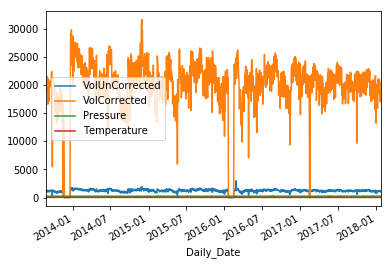

In [11]:
inst.set_index('Daily_Date').plot()

In [12]:
inst.drop(['Daily_Date'], axis = 1)

VolUnCorrected  VolCorrected  Pressure  Temperature
127            1228.00      20478.64    231.00        27.00
248            1266.53      21067.44    230.00        27.00
317            1243.46      20767.46    231.00        27.00
386            1087.00      18598.79    237.00        27.00
454            1271.00      21049.09    229.00        27.00
...                ...           ...       ...          ...
395474         1207.53      20334.97    232.55        26.55
395587         1194.46      20168.35    233.16        26.54
396169         1161.29      19682.54    234.03        26.51
396432          986.33      17032.51    238.42        26.44
396757         1123.07      19011.56    116.87        13.25

[1612 rows x 4 columns]

In [13]:
scaler = StandardScaler()
stan = scaler.fit_transform(inst.drop(['Daily_Date'], axis = 1))
#stan= inst.drop(['Daily_Date'] # quitarlo para datos escalados

datframe = pd.DataFrame(data=stan,columns=inst.drop(['Daily_Date'],axis = 1).columns)
datframe['Daily_Date'] = daily.reset_index(drop=True)

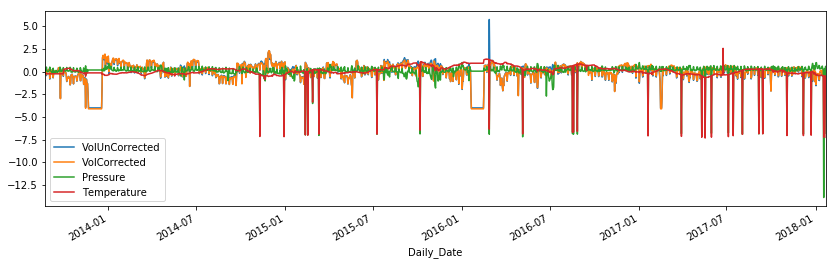

In [14]:
year = 2014
img = datframe.set_index(['Daily_Date']).plot(figsize =(14,4))
# img.set_xlim([datetime.date(year, 1, 1), datetime.date(year, 12, 31)])

Text(0.5, 1.0, 'Prueba')

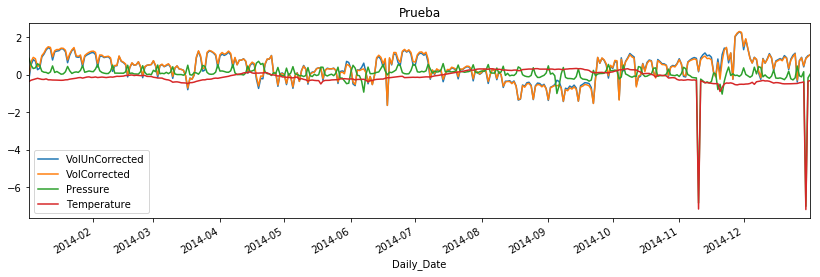

In [15]:
fig = datframe.set_index(['Daily_Date'])['2014'].plot(figsize = (14,4))
fig.set_title('Prueba')

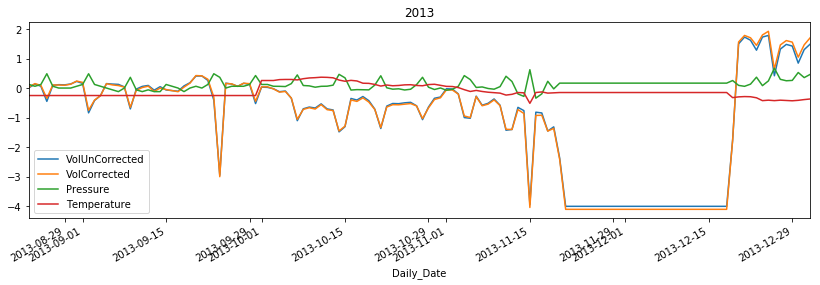

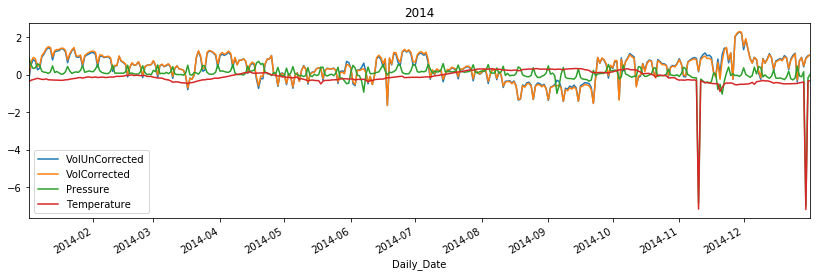

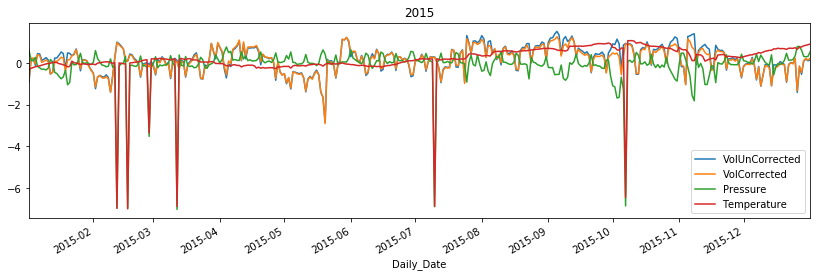

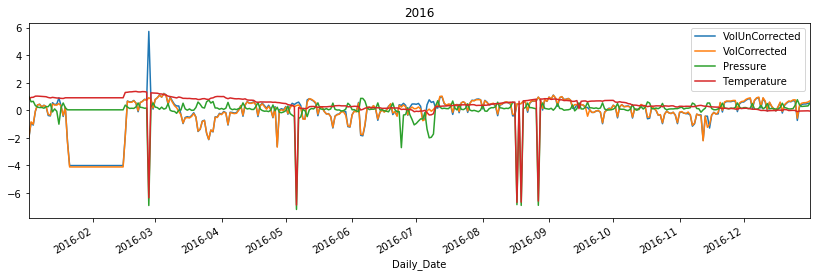

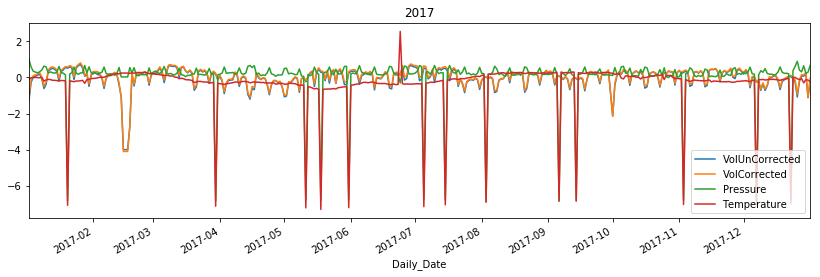

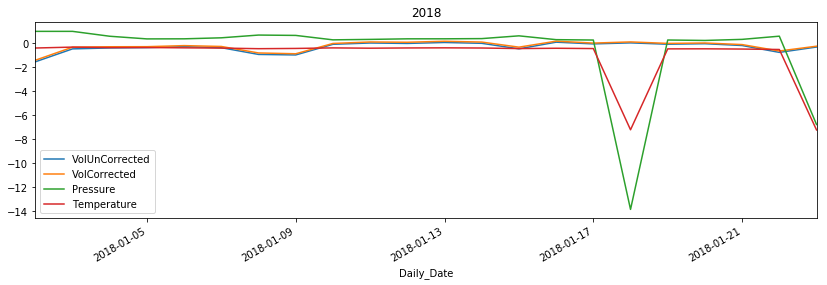

In [16]:
for i in range(2013,2019):
    
    fig = datframe.set_index(['Daily_Date'])[str(i)].plot(figsize = (14,4))
    fig.set_title(i)

In [17]:
datframe.sort_values(by = 'Daily_Date', inplace=True)

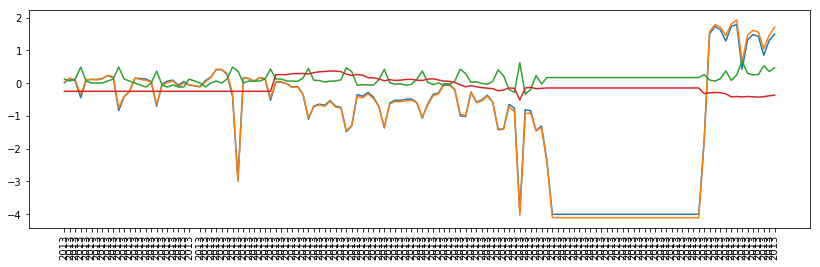

(131, 8)


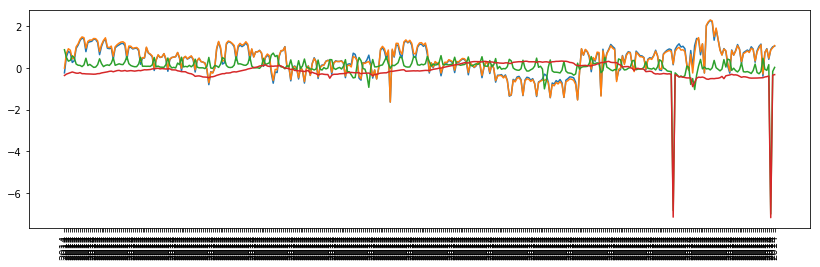

(365, 8)


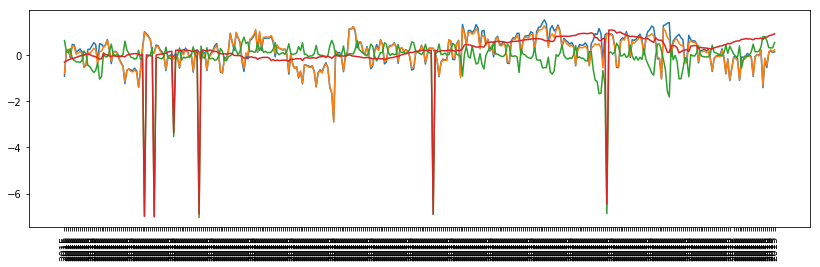

(364, 8)


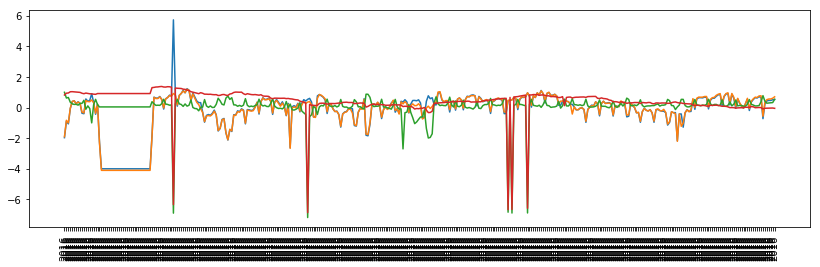

(366, 8)


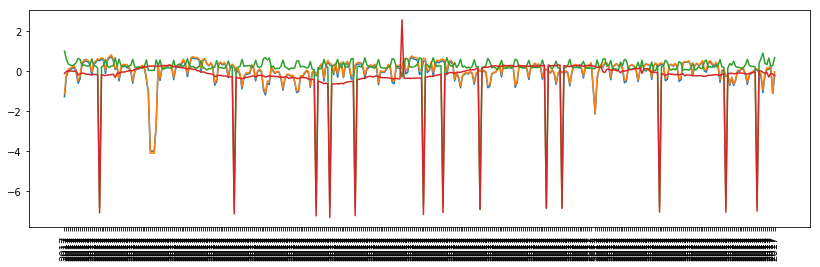

(364, 8)


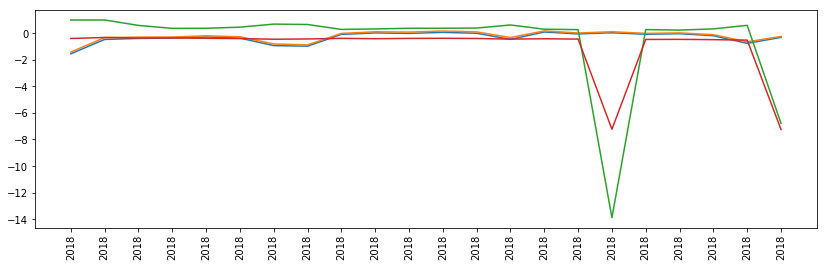

(22, 8)


In [18]:
datframe['Day'] = datframe['Daily_Date'].dt.date
datframe['Year'] = datframe['Daily_Date'].dt.year
datframe['Month'] = datframe['Daily_Date'].dt.month
for i in range(2013,2019):
    plt.figure(figsize = (14,4))
    mapa = datframe['Year']==i
    anual = datframe[mapa]
    plt.plot(anual['Day'],anual['VolUnCorrected'])
    plt.plot(anual['Day'],anual['VolCorrected'])
    plt.plot(anual['Day'],anual['Pressure'])
    plt.plot(anual['Day'],anual['Temperature'])
    plt.xticks(anual['Day'],rotation =90)
    plt.show()
    print(anual.shape)

In [19]:
mapa = datframe['Year']==2013
anual = datframe[mapa]

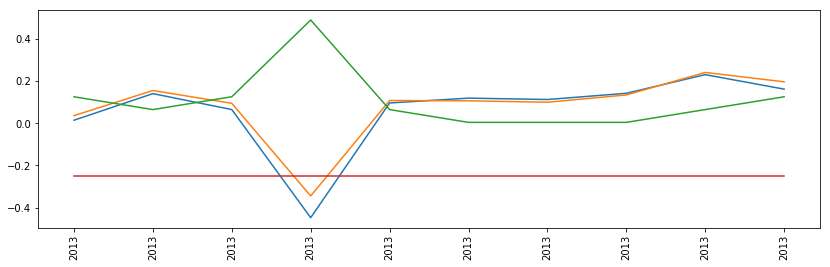

(131, 8) 8


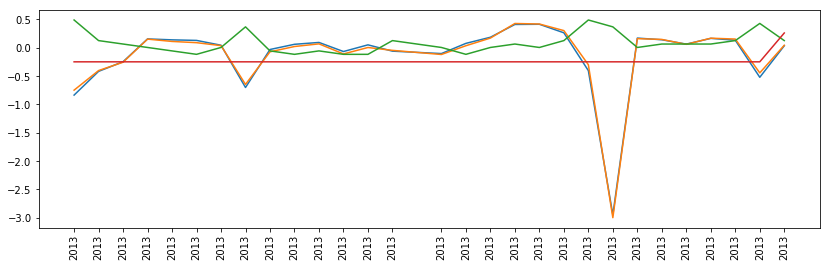

(131, 8) 9


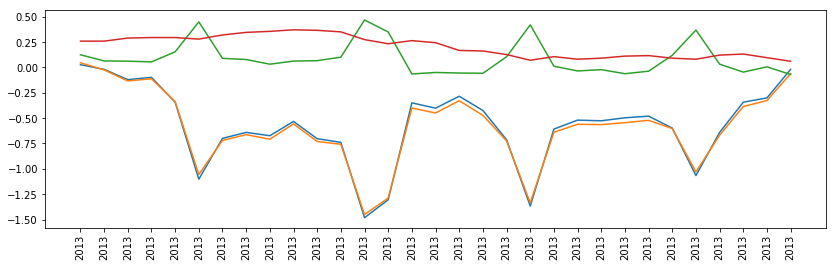

(131, 8) 10


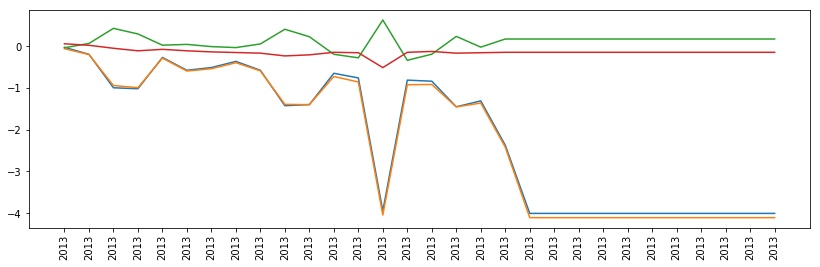

(131, 8) 11


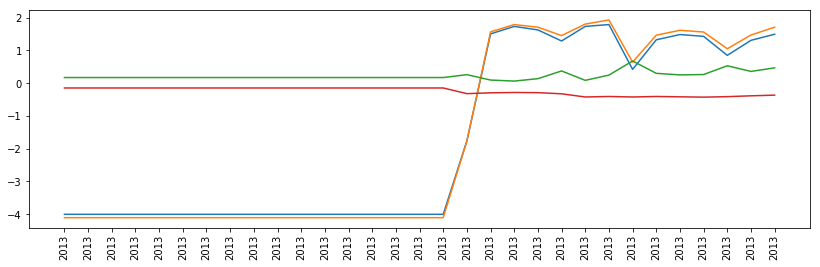

(131, 8) 12


In [20]:
for i in anual['Month'].unique():

    

    plt.figure(figsize = (14,4))
    mapa = anual['Month']==i
    mensual = anual[mapa]
    plt.plot(mensual['Day'],mensual['VolUnCorrected'])
    plt.plot(mensual['Day'],mensual['VolCorrected'])
    plt.plot(mensual['Day'],mensual['Pressure'])
    plt.plot(mensual['Day'],mensual['Temperature'])
    plt.xticks(mensual['Day'],rotation =90)
    plt.show()
    print(anual.shape, i )

In [21]:
mensual

VolUnCorrected  VolCorrected  Pressure  Temperature          Daily_Date  \
100       -4.003892     -4.105947  0.169614    -0.148588 2013-12-01 23:59:59   
101       -4.003892     -4.105947  0.169614    -0.148588 2013-12-02 23:59:59   
102       -4.003892     -4.105947  0.169614    -0.148588 2013-12-03 23:59:59   
104       -4.003892     -4.105947  0.169614    -0.148588 2013-12-04 23:59:59   
103       -4.003892     -4.105947  0.169614    -0.148588 2013-12-05 23:59:59   
105       -4.003892     -4.105947  0.169614    -0.148588 2013-12-06 23:59:59   
106       -4.003892     -4.105947  0.169614    -0.148588 2013-12-07 23:59:59   
107       -4.003892     -4.105947  0.169614    -0.148588 2013-12-08 23:59:59   
108       -4.003892     -4.105947  0.169614    -0.148588 2013-12-09 23:59:59   
109       -4.003892     -4.105947  0.169614    -0.148588 2013-12-10 23:59:59   
110       -4.003892     -4.105947  0.169614    -0.148588 2013-12-11 23:59:59   
111       -4.003892     -4.105947  0.169614    -0.148588 2013-12-12 23:59:59   
112       -4.003892     -4.105947  0.169614    -0.148588 2013-12-13 23:59:59   
113       -4.003892     -4.105947  0.169614    -0.148588 2013-12-14 23:59:59   
114       -4.003892     -4.105947  0.169614    -0.148588 2013-12-15 23:59:59   
115       -4.003892     -4.105947  0.169614    -0.148588 2013-12-16 23:59:59   
116       -4.003892     -4.105947  0.169614    -0.148588 2013-12-17 23:59:59   
117       -1.759857     -1.767768  0.257467    -0.321574 2013-12-18 23:59:59   
118        1.501550      1.563773  0.093273    -0.296135 2013-12-19 23:59:59   
119        1.730272      1.785628  0.061767    -0.285959 2013-12-20 23:59:59   
120        1.622780      1.705859  0.135684    -0.291047 2013-12-21 23:59:59   
121        1.285619      1.449634  0.370767    -0.326662 2013-12-22 23:59:59   
122        1.730468      1.801539  0.084184    -0.423330 2013-12-23 23:59:59   
123        1.786111      1.925820  0.244743    -0.408067 2013-12-24 23:59:59   
124        0.418754      0.640671  0.674314    -0.423330 2013-12-25 23:59:59   
125        1.321602      1.462708  0.298061    -0.408067 2013-12-26 23:59:59   
126        1.481890      1.611732  0.250196    -0.418242 2013-12-27 23:59:59   
127        1.426247      1.558612  0.261708    -0.428418 2013-12-28 23:59:59   
128        0.847280      1.048947  0.529508    -0.413155 2013-12-29 23:59:59   
129        1.305213      1.467409  0.356832    -0.387716 2013-12-30 23:59:59   
130        1.491671      1.705713  0.465285    -0.367364 2013-12-31 23:59:59   

            Day  Year  Month  
100  2013-12-01  2013     12  
101  2013-12-02  2013     12  
102  2013-12-03  2013     12  
104  2013-12-04  2013     12  
103  2013-12-05  2013     12  
105  2013-12-06  2013     12  
106  2013-12-07  2013     12  
107  2013-12-08  2013     12  
108  2013-12-09  2013     12  
109  2013-12-10  2013     12  
110  2013-12-11  2013     12  
111  2013-12-12  2013     12  
112  2013-12-13  2013     12  
113  2013-12-14  2013     12  
114  2013-12-15  2013     12  
115  2013-12-16  2013     12  
116  2013-12-17  2013     12  
117  2013-12-18  2013     12  
118  2013-12-19  2013     12  
119  2013-12-20  2013     12  
120  2013-12-21  2013     12  
121  2013-12-22  2013     12  
122  2013-12-23  2013     12  
123  2013-12-24  2013     12  
124  2013-12-25  2013     12  
125  2013-12-26  2013     12  
126  2013-12-27  2013     12  
127  2013-12-28  2013     12  
128  2013-12-29  2013     12  
129  2013-12-30  2013     12  
130  2013-12-31  2013     12

In [22]:
salida = scaler.inverse_transform(mensual[inst.drop(['Daily_Date'],axis = 1).columns.tolist()])
pd.DataFrame(data=salida, columns=inst.drop(['Daily_Date'],axis = 1).columns.tolist())

VolUnCorrected  VolCorrected  Pressure  Temperature
0             0.00          0.00    231.75        27.20
1             0.00          0.00    231.75        27.20
2             0.00          0.00    231.75        27.20
3             0.00          0.00    231.75        27.20
4             0.00          0.00    231.75        27.20
5             0.00          0.00    231.75        27.20
6             0.00          0.00    231.75        27.20
7             0.00          0.00    231.75        27.20
8             0.00          0.00    231.75        27.20
9             0.00          0.00    231.75        27.20
10            0.00          0.00    231.75        27.20
11            0.00          0.00    231.75        27.20
12            0.00          0.00    231.75        27.20
13            0.00          0.00    231.75        27.20
14            0.00          0.00    231.75        27.20
15            0.00          0.00    231.75        27.20
16            0.00          0.00    231.75        27.20
17          686.00      11563.82    233.20        26.86
18         1683.01      28040.46    230.49        26.91
19         1752.93      29137.68    229.97        26.93
20         1720.07      28743.17    231.19        26.92
21         1617.00      27475.97    235.07        26.85
22         1752.99      29216.37    230.34        26.66
23         1770.00      29831.02    232.99        26.69
24         1352.00      23475.12    240.08        26.66
25         1628.00      27540.63    233.87        26.69
26         1677.00      28277.65    233.08        26.67
27         1659.99      28014.94    233.27        26.65
28         1483.00      25494.31    237.69        26.68
29         1622.99      27563.88    234.84        26.73
30         1679.99      28742.45    236.63        26.77

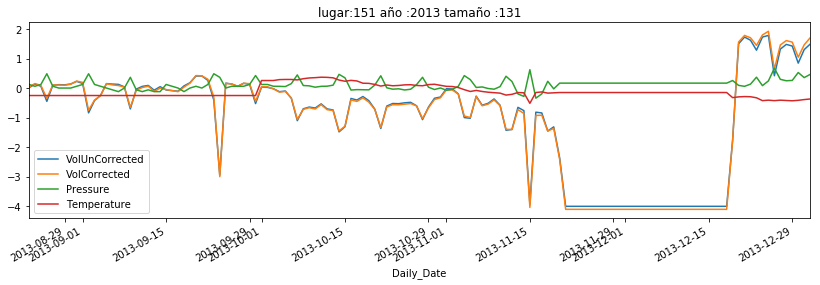

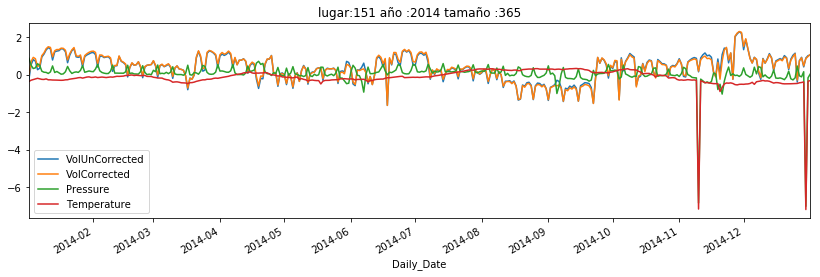

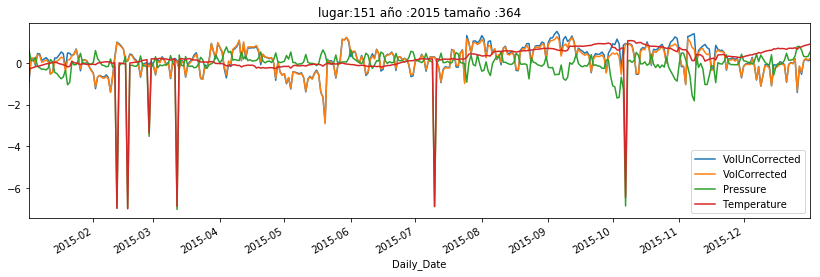

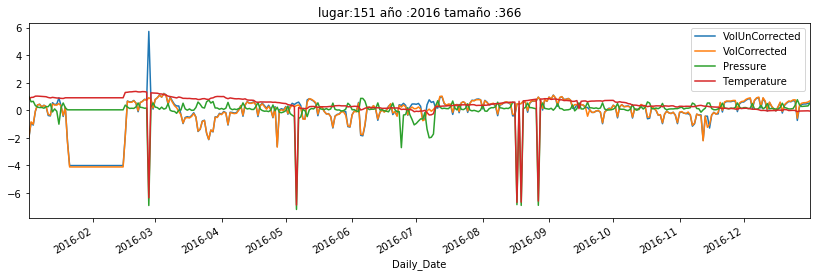

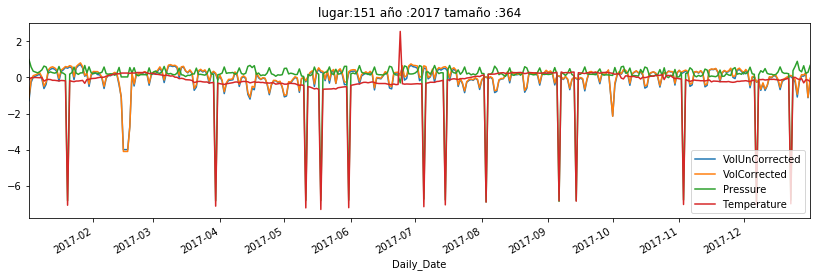

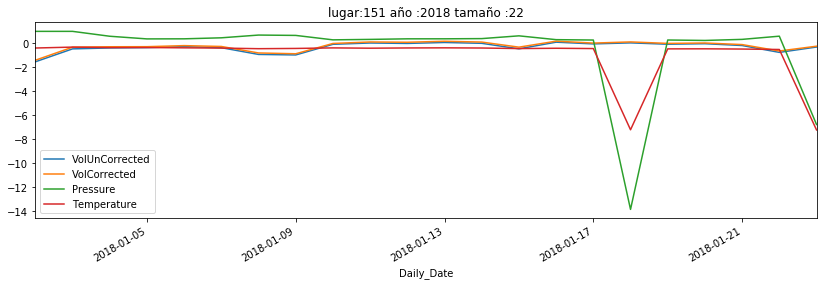

----------------------------------------------------------------------------------------------------
****************************************************************************************************


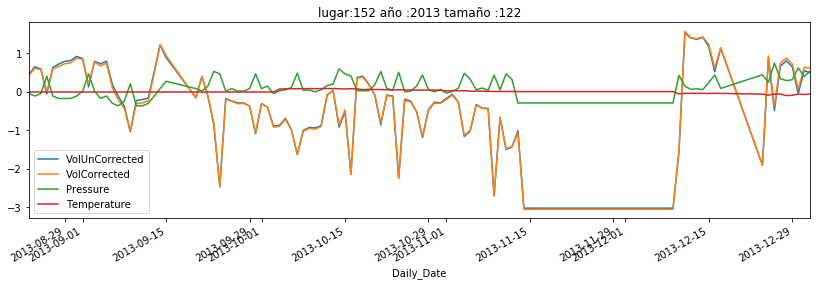

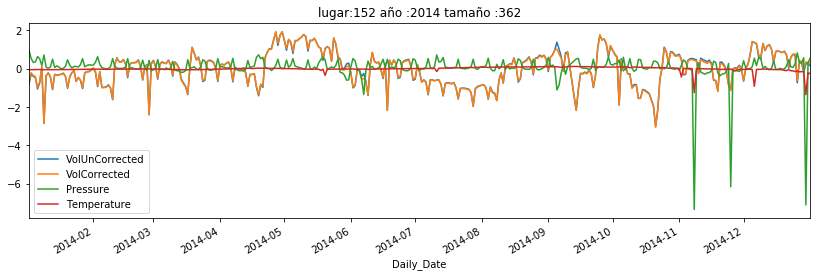

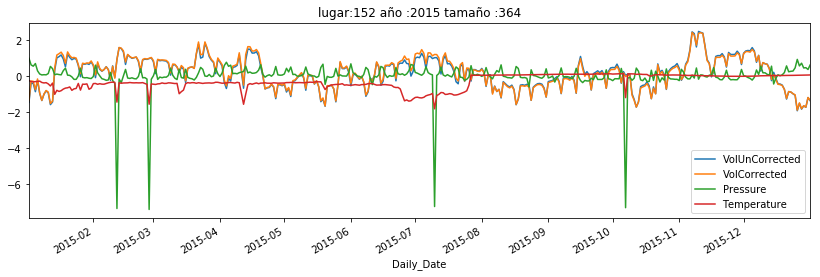

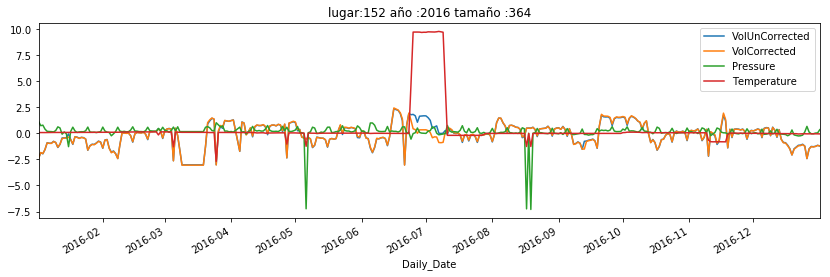

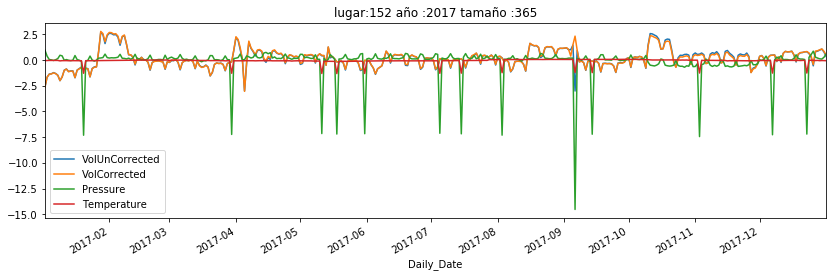

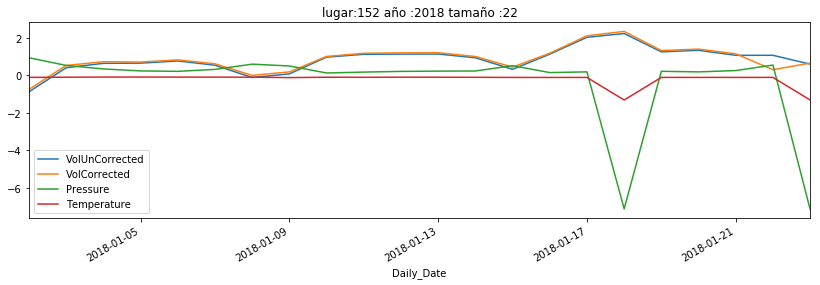

----------------------------------------------------------------------------------------------------
****************************************************************************************************


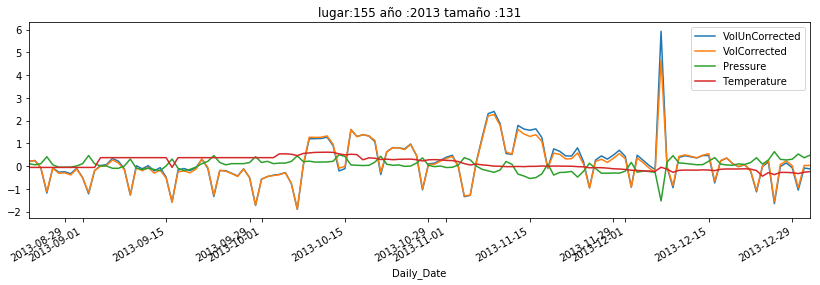

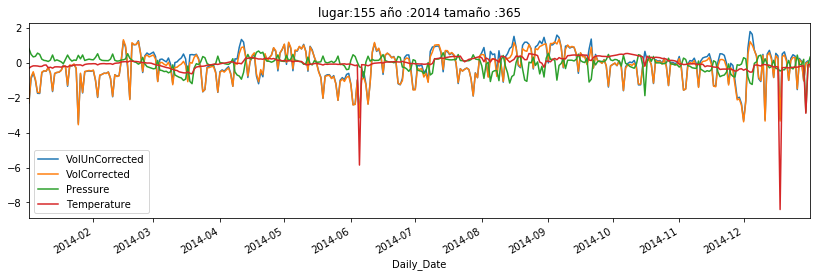

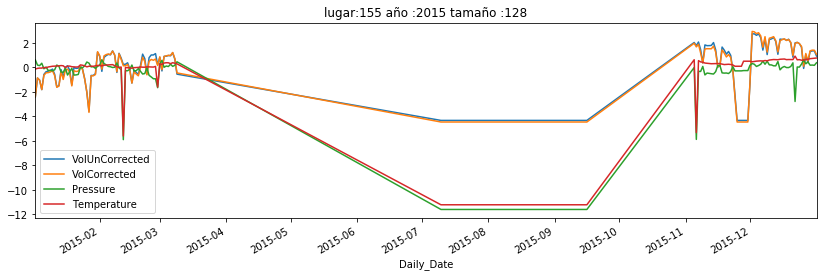

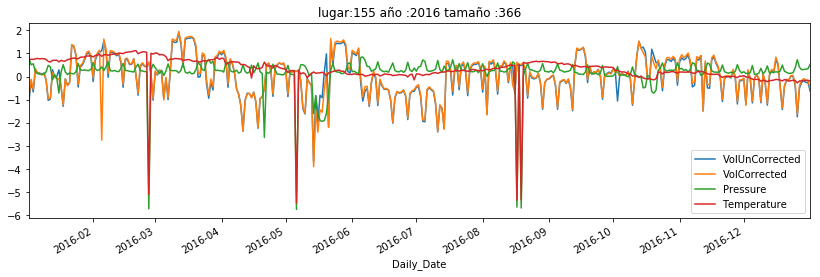

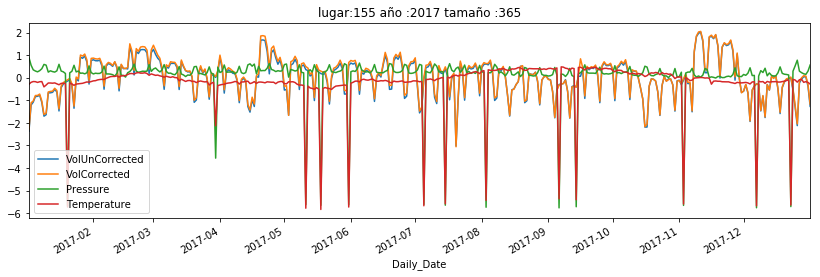

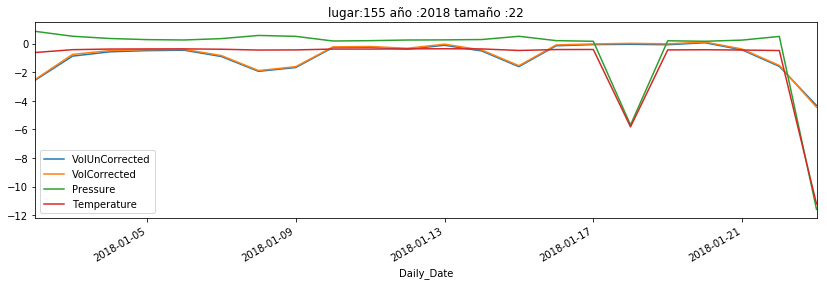

----------------------------------------------------------------------------------------------------
****************************************************************************************************


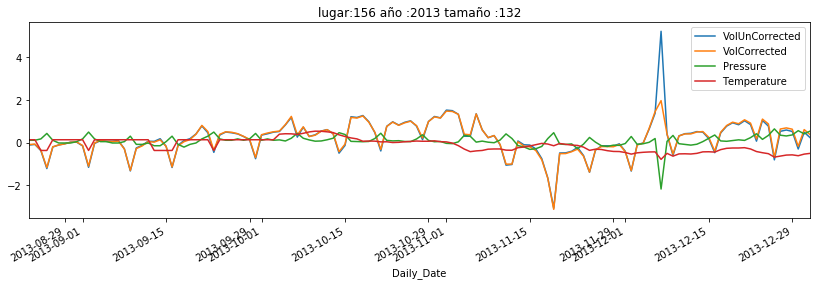

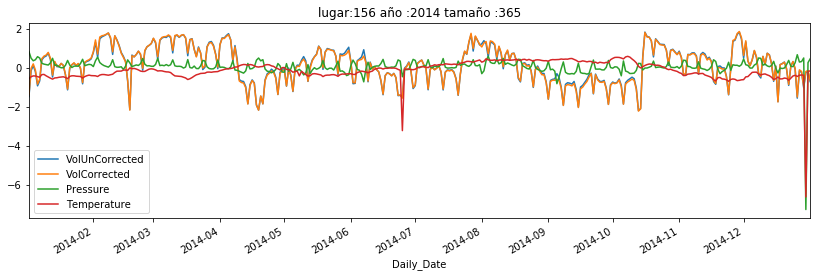

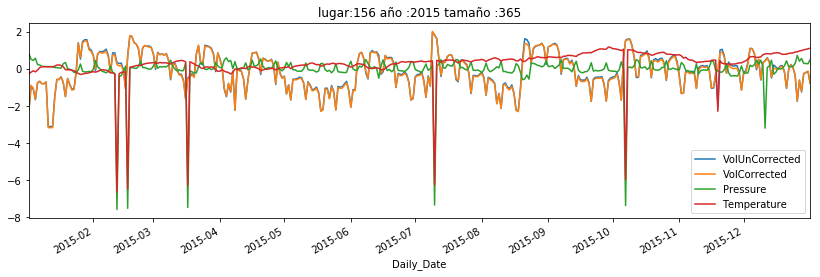

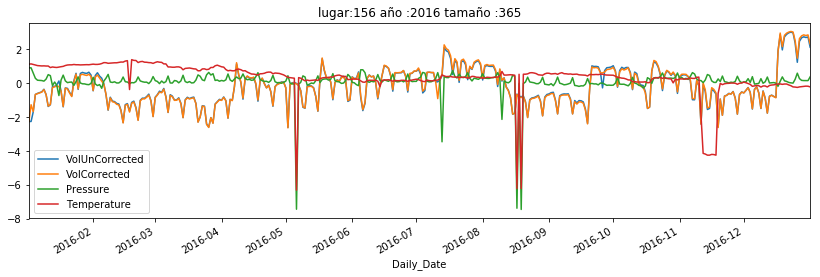

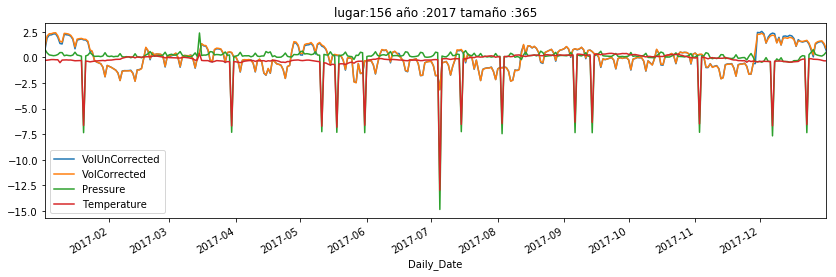

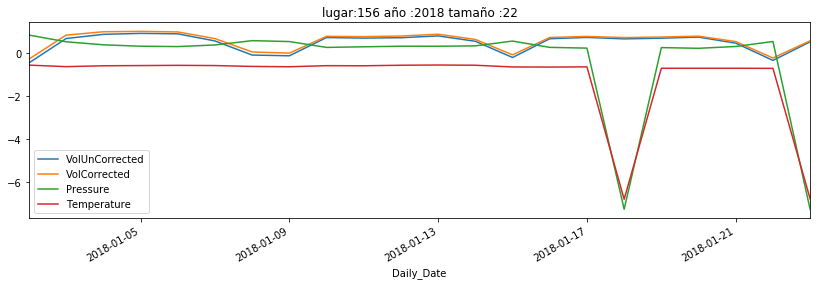

----------------------------------------------------------------------------------------------------
****************************************************************************************************


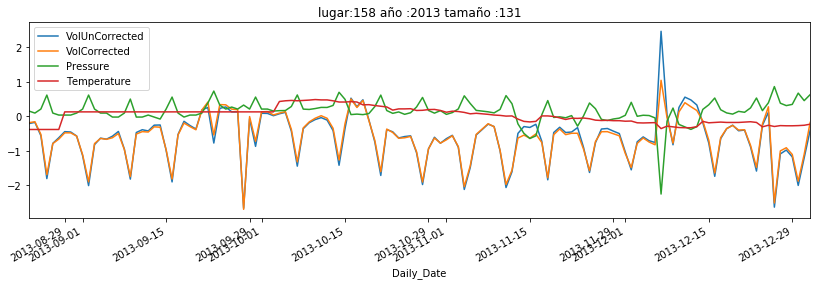

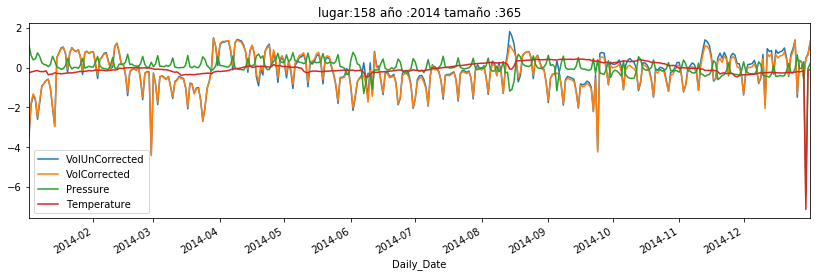

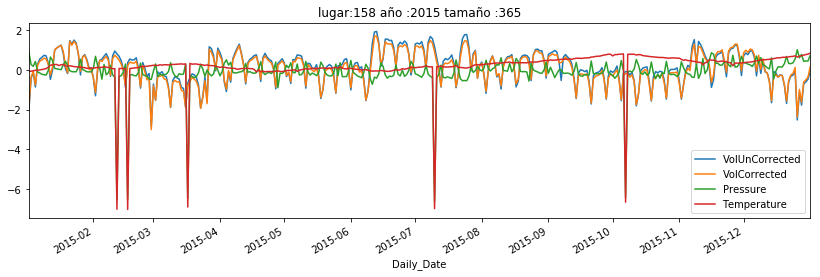

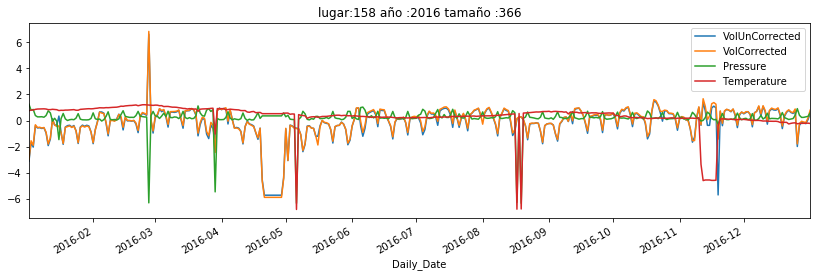

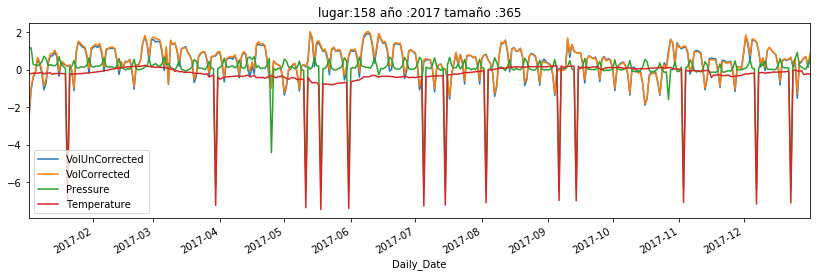

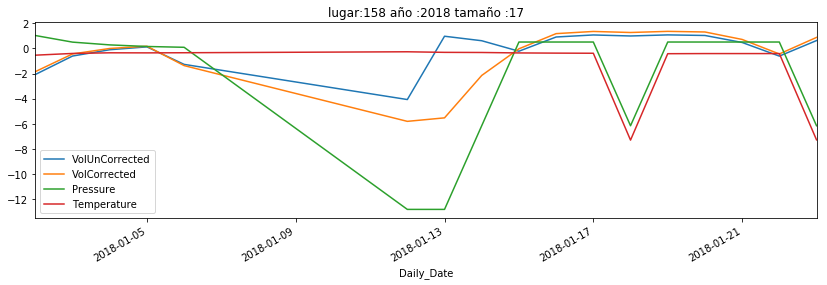

----------------------------------------------------------------------------------------------------
****************************************************************************************************


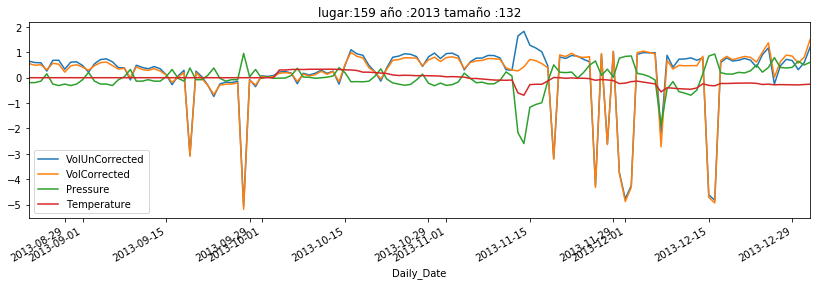

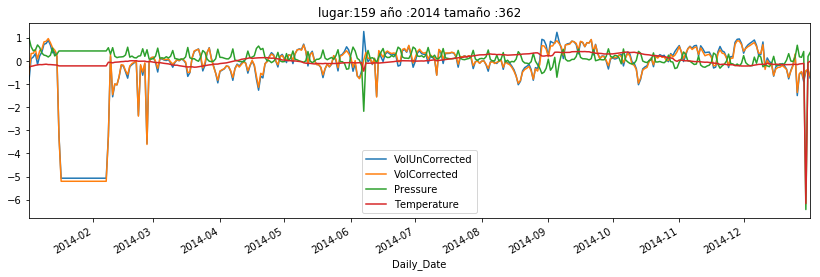

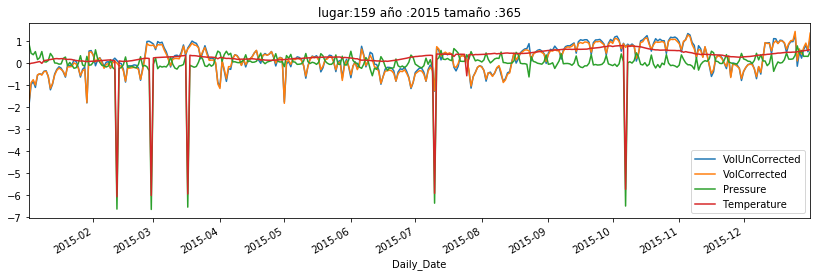

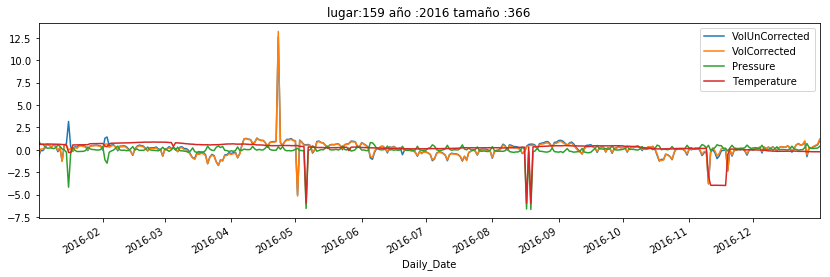

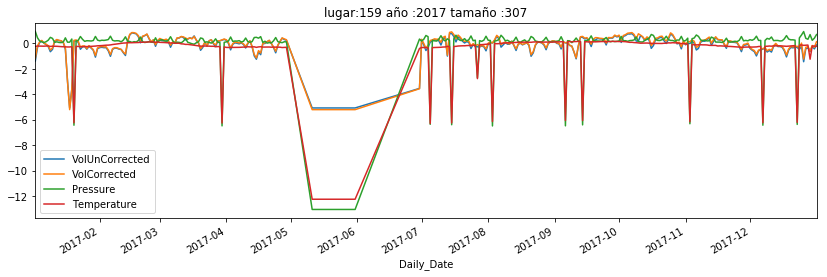

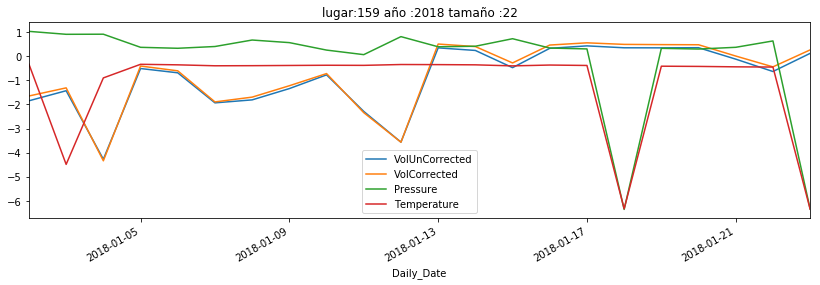

----------------------------------------------------------------------------------------------------
****************************************************************************************************


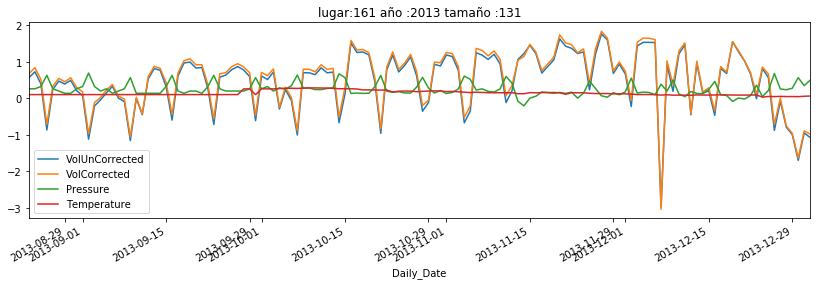

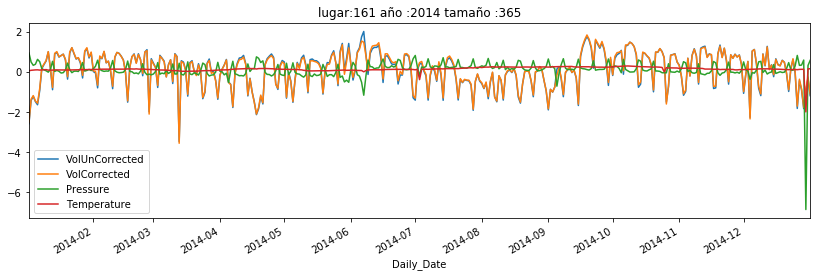

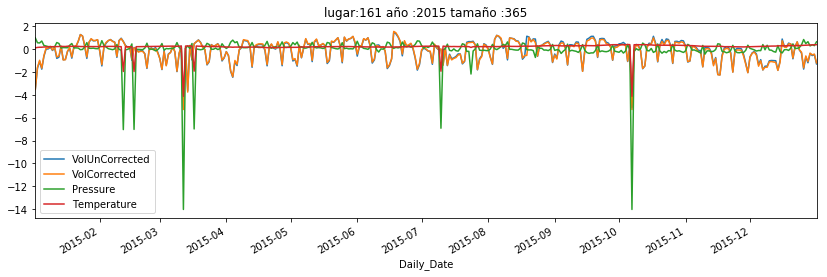

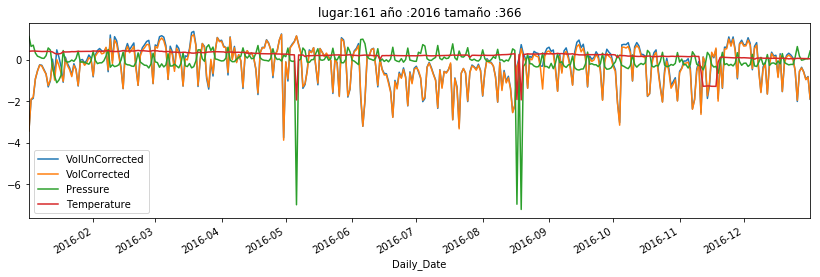

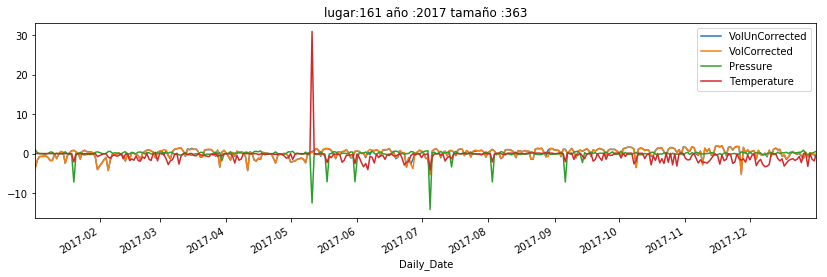

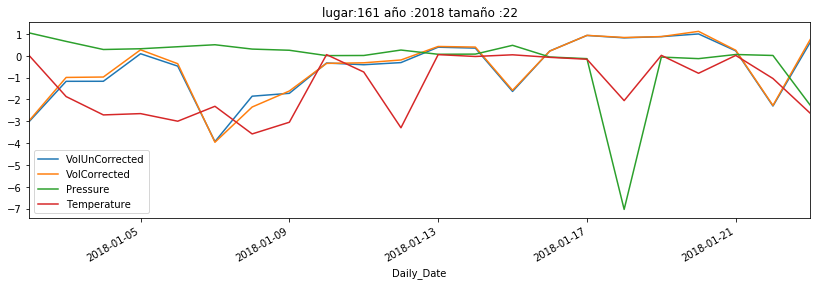

----------------------------------------------------------------------------------------------------
****************************************************************************************************


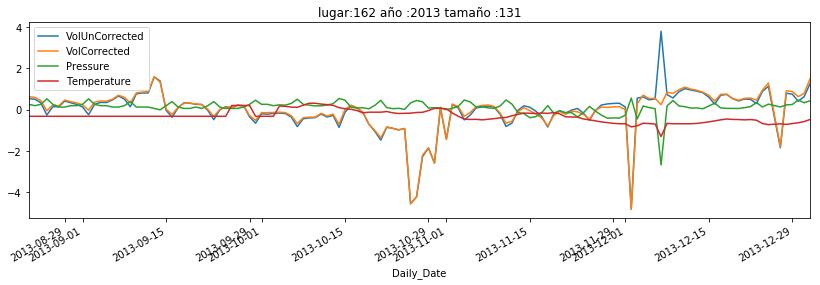

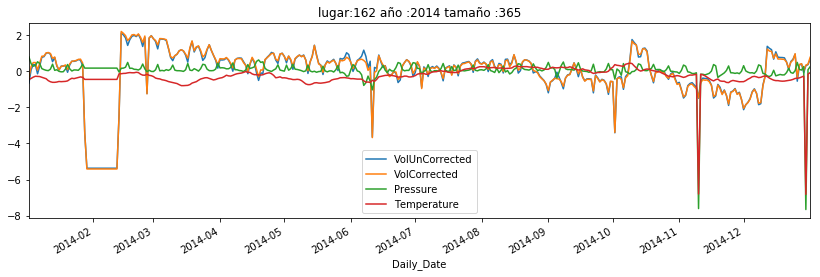

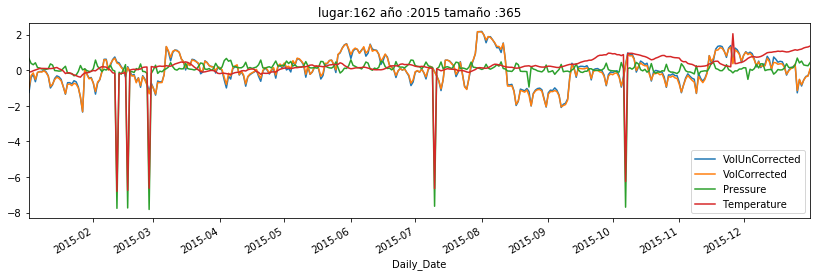

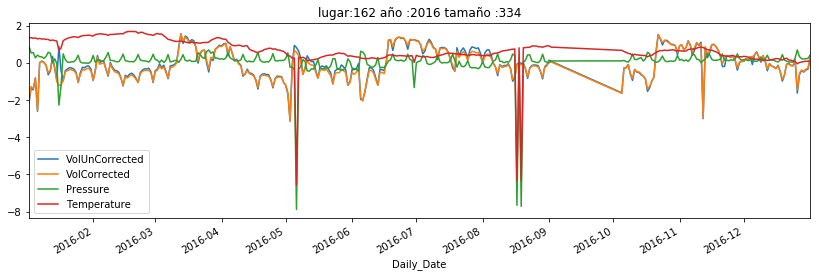

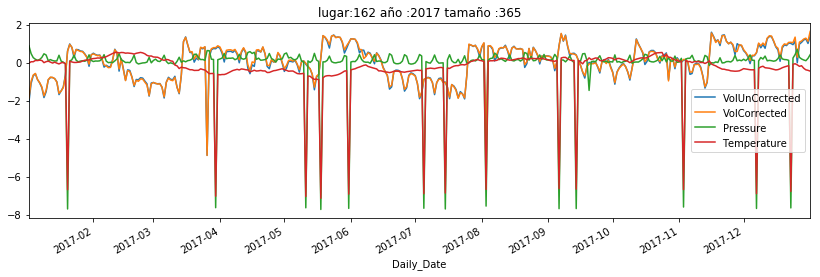

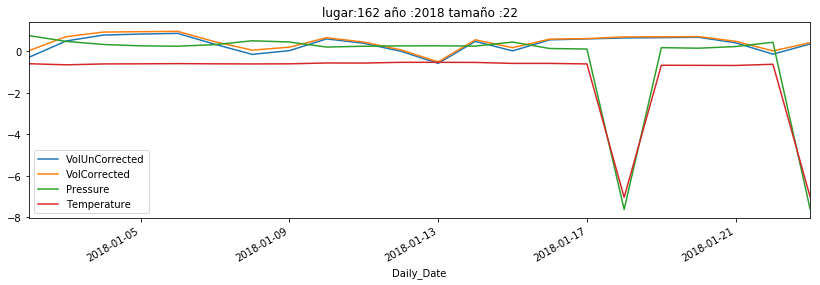

----------------------------------------------------------------------------------------------------
****************************************************************************************************


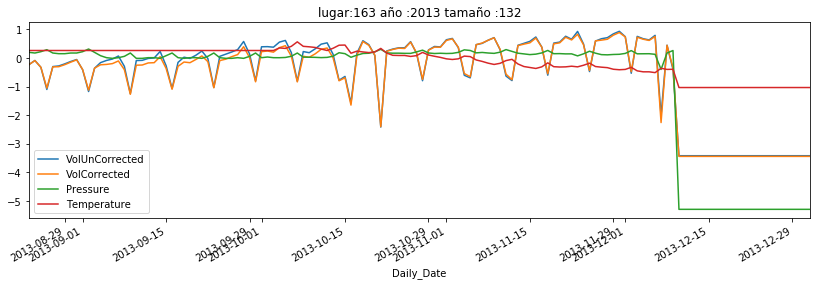

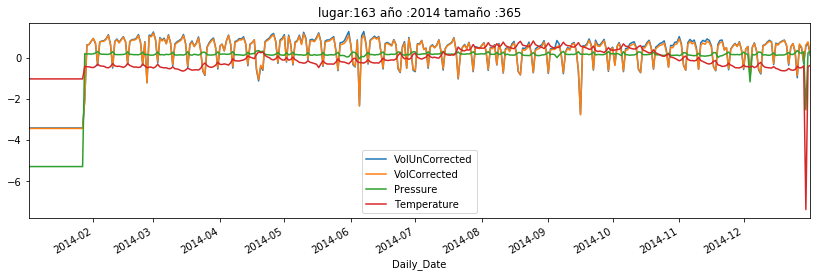

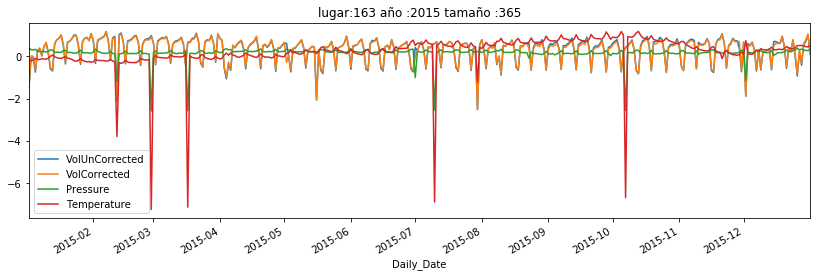

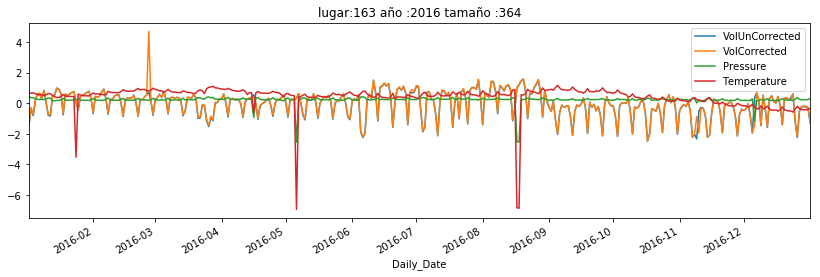

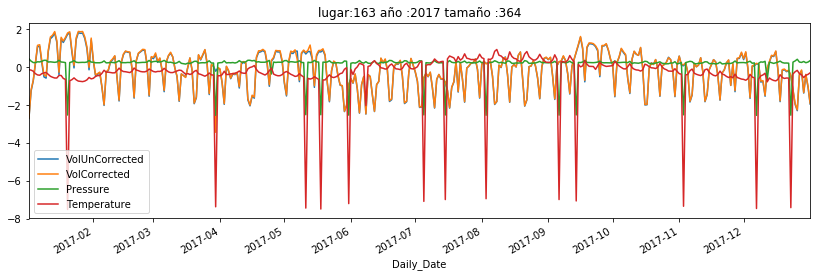

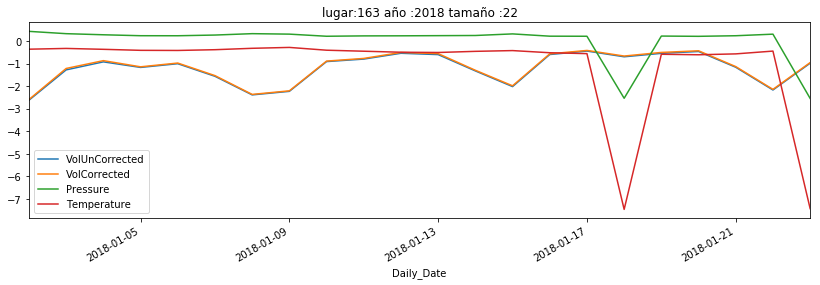

----------------------------------------------------------------------------------------------------
****************************************************************************************************


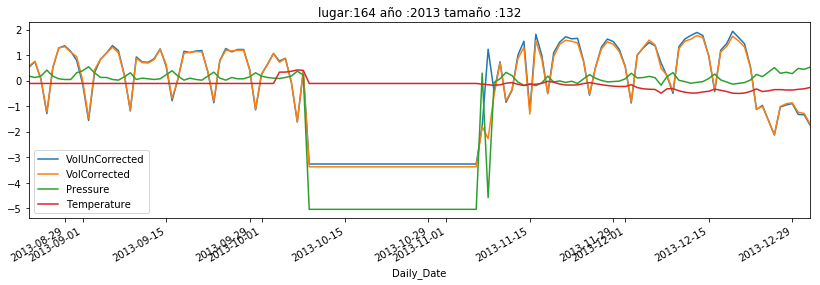

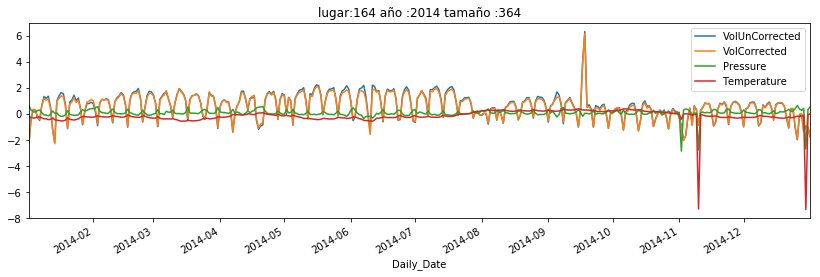

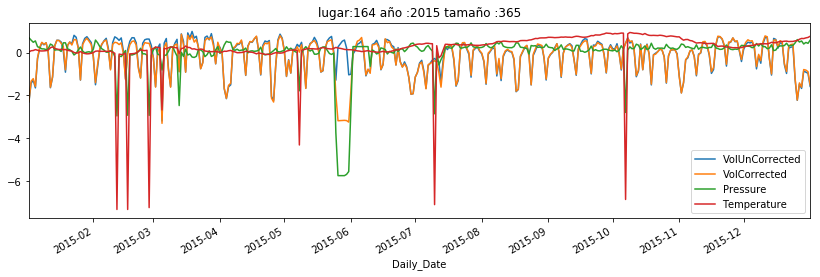

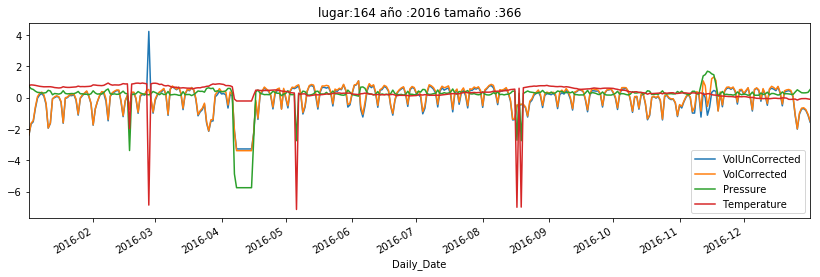

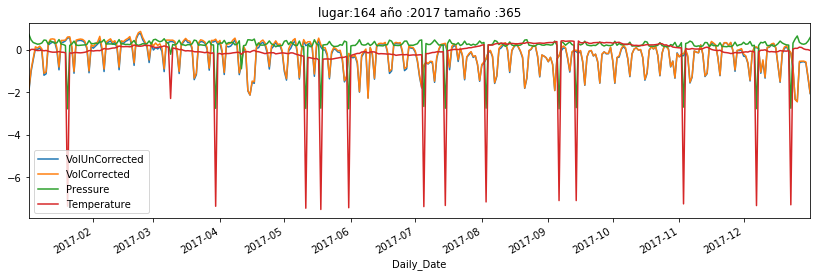

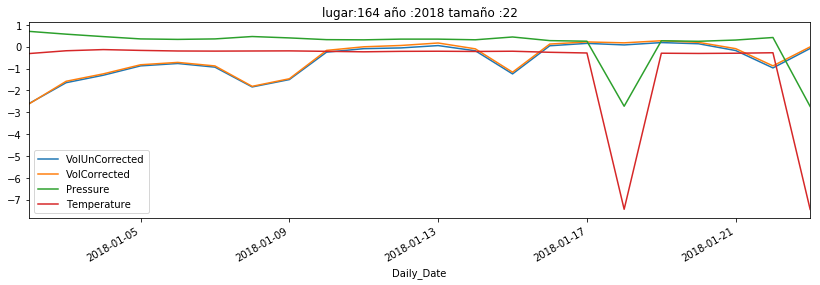

----------------------------------------------------------------------------------------------------
****************************************************************************************************


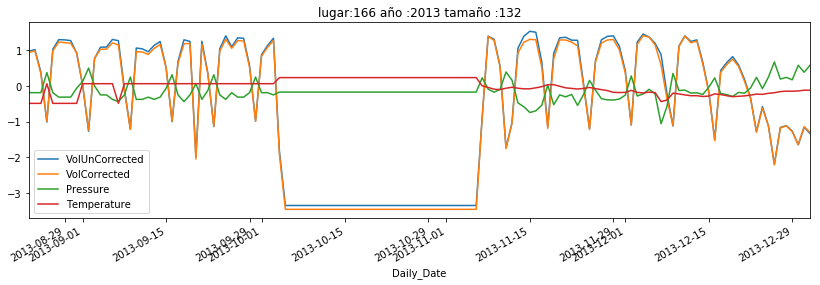

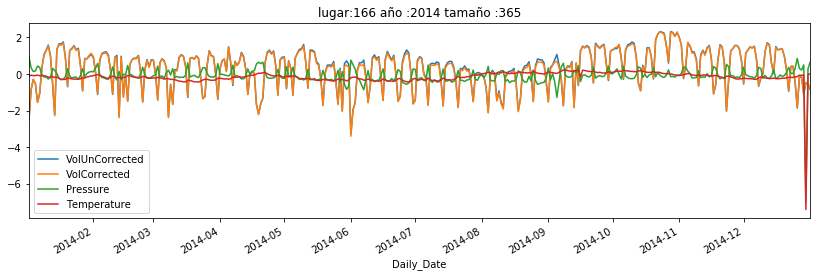

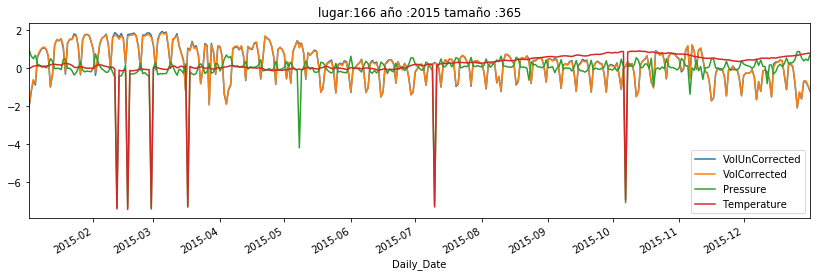

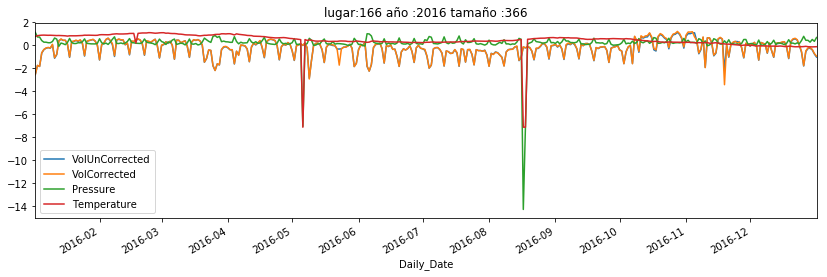

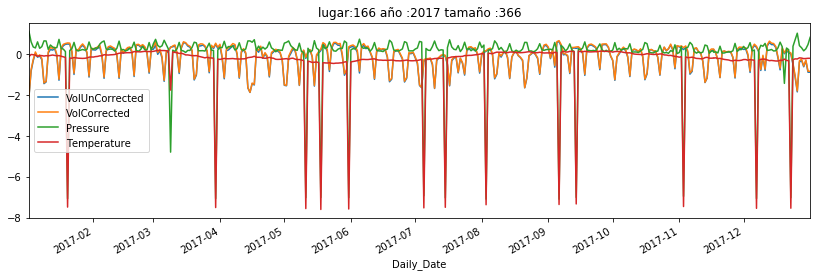

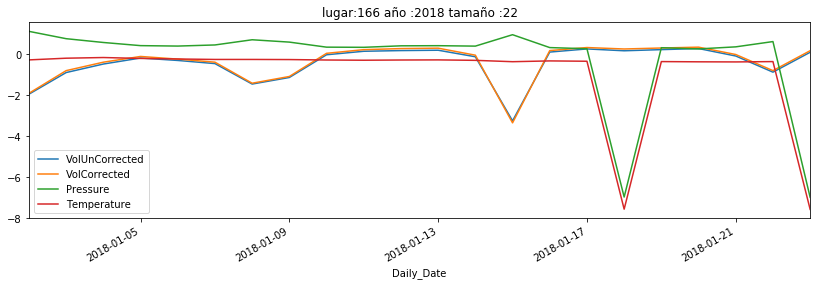

----------------------------------------------------------------------------------------------------
****************************************************************************************************


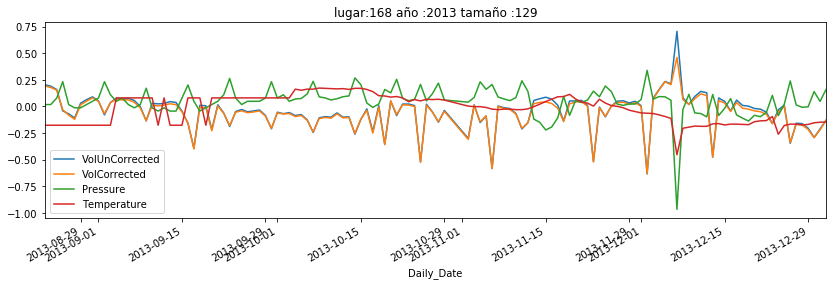

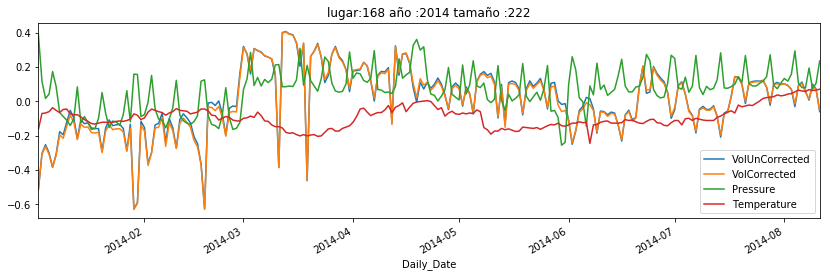

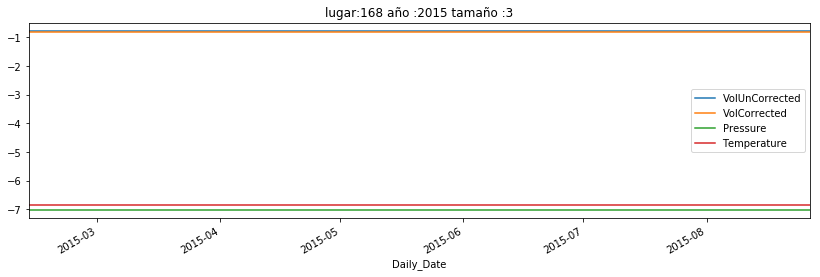

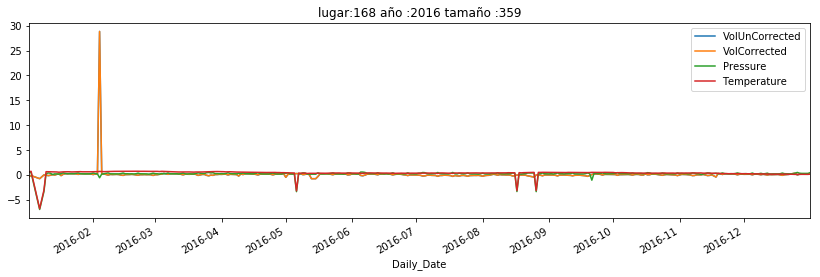

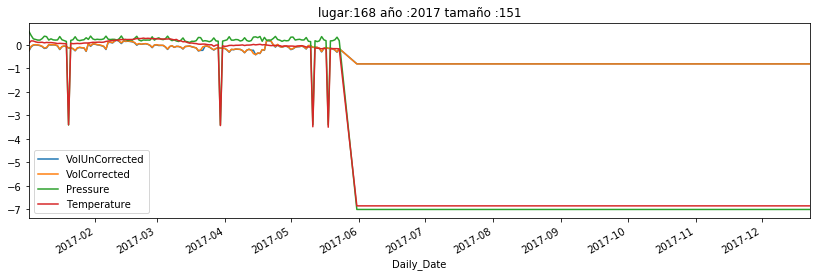

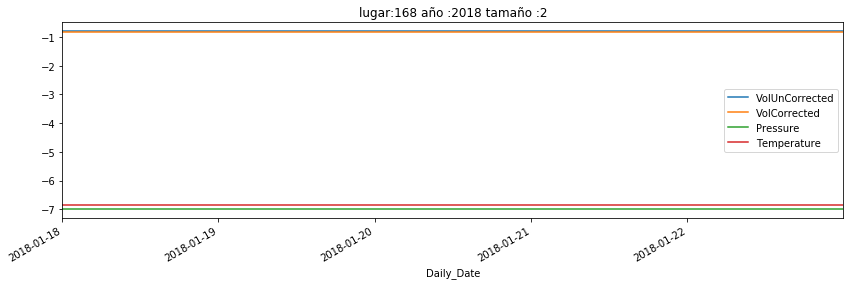

----------------------------------------------------------------------------------------------------
****************************************************************************************************


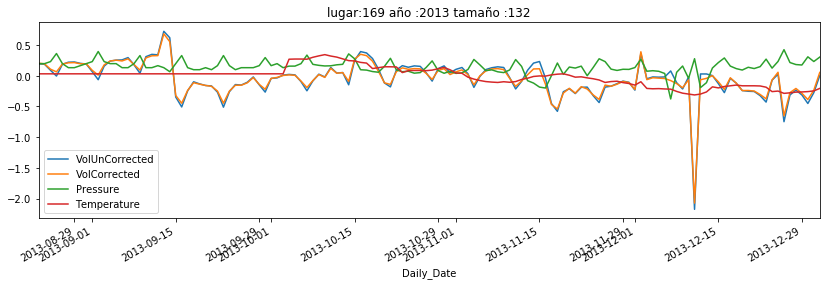

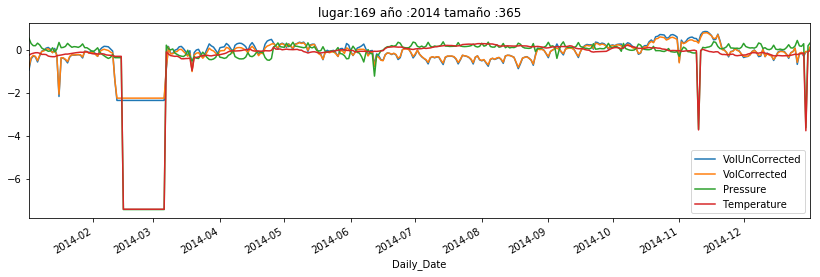

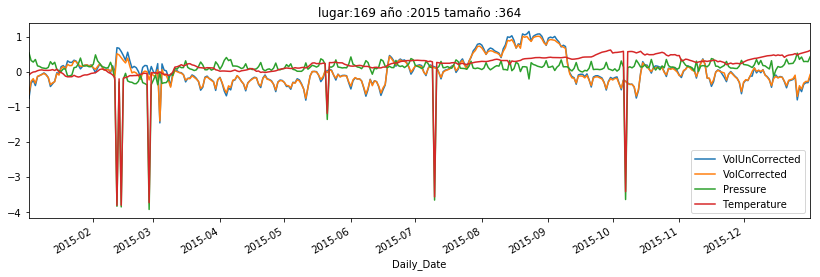

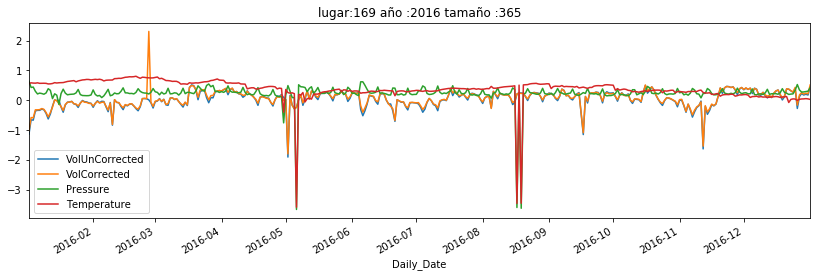

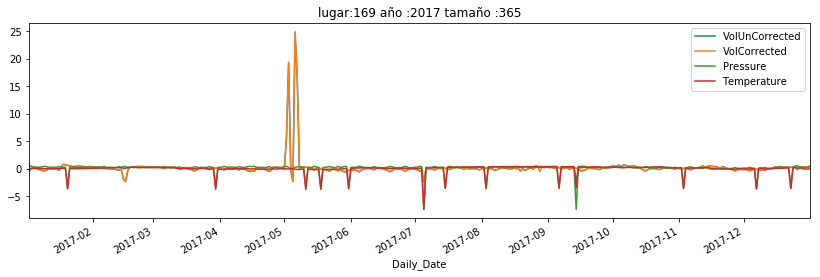

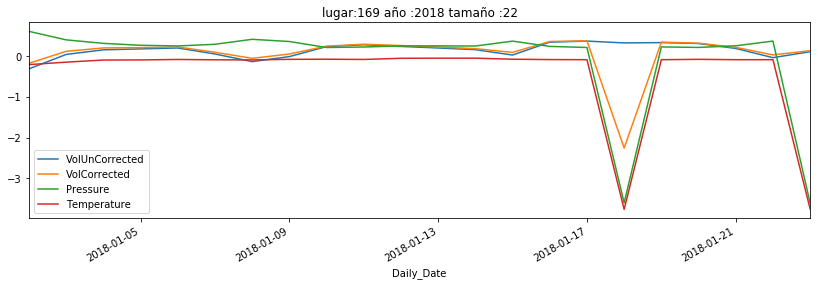

----------------------------------------------------------------------------------------------------
****************************************************************************************************


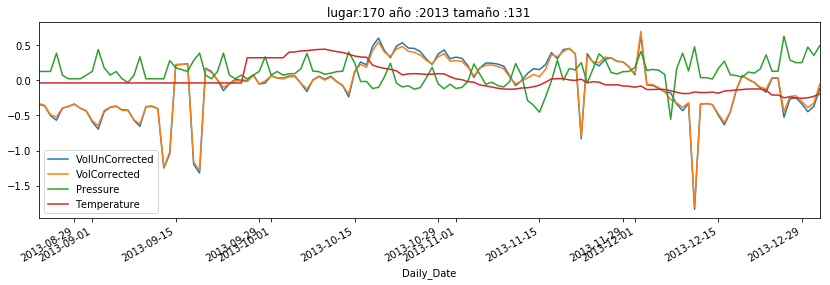

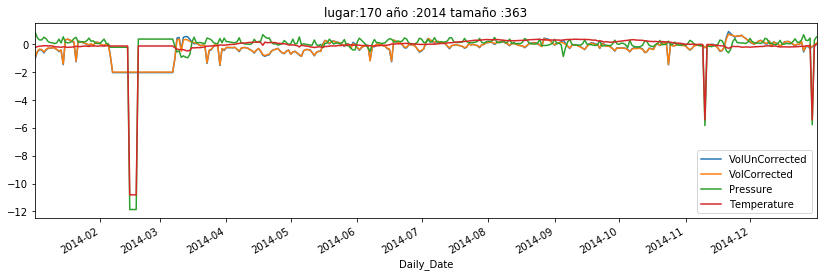

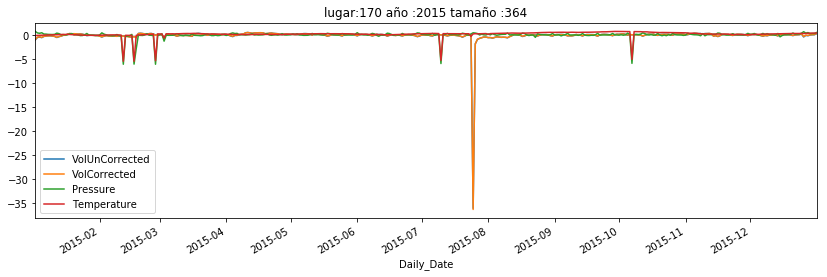

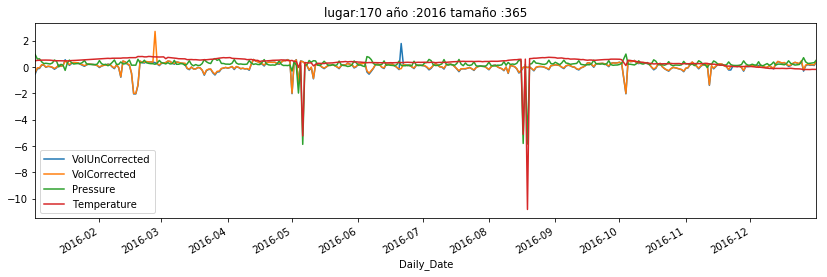

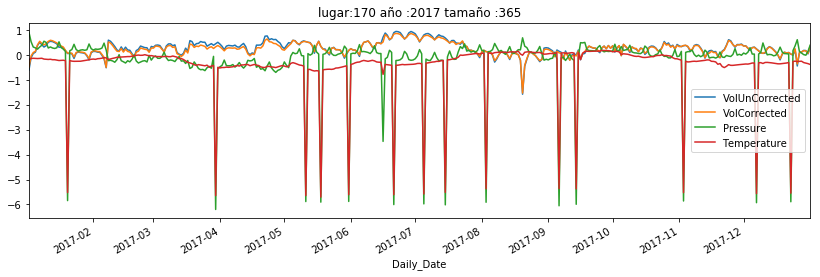

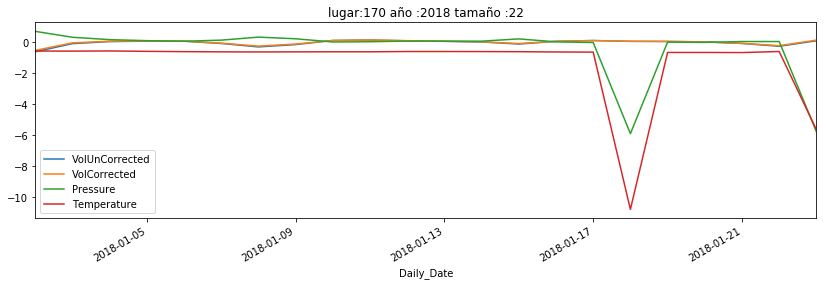

----------------------------------------------------------------------------------------------------
****************************************************************************************************


In [23]:
for j in [151, 152, 155, 156, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170]:
    mapa = grupo2['id_sitio']==j
    inst = grupo2[mapa].copy()
    day = inst['Day']
    daily =inst['Daily_Date'] 
    inst.drop(['id_RTU','id_sitio','Day'],axis = 1,inplace = True)
    scaler = StandardScaler()
    stan = scaler.fit_transform(inst.drop(['Daily_Date'], axis = 1))
    #stan= inst.drop(['Daily_Date'] # quitarlo para datos escalados

    datframe = pd.DataFrame(data=stan,columns=inst.drop(['Daily_Date'],axis = 1).columns)
    datframe['Daily_Date'] = daily.reset_index(drop=True)
    
    for i in range(2013,2019):

        fig = datframe.set_index(['Daily_Date'])[str(i)].plot(figsize = (14,4))
        fig.set_title('lugar:{} año :{} tamaño :{}'.format(j,i,datframe.set_index(['Daily_Date'])[str(i)].shape[0]))
        plt.show()
    print('-'*100)
    print('*'*100)

In [24]:
# condiciones mas de 2 desviaciones estandart.y 3 periodos con mismo valor.

In [25]:
datframe.sort_values(by='Daily_Date',inplace = True)
datframe.reset_index(inplace=True,drop=True)

mapa = grupo2['id_sitio']==151
inst = grupo2[mapa].copy()
day = inst['Day']
daily =inst['Daily_Date'] 
inst.drop(['id_RTU','id_sitio','Day'],axis = 1,inplace = True)
scaler = StandardScaler()
stan = scaler.fit_transform(inst.drop(['Daily_Date'], axis = 1))
#stan= inst.drop(['Daily_Date'] # quitarlo para datos escalados

datframe = pd.DataFrame(data=stan,columns=inst.drop(['Daily_Date'],axis = 1).columns)

datframe['Daily_Date'] = daily.reset_index(drop=True)
    
#     for i in range(2013,2019):

#         fig = datframe.set_index(['Daily_Date'])[str(i)].plot(figsize = (14,4))
#         fig.set_title('lugar:{} año :{} tamaño :{}'.format(j,i,datframe.set_index(['Daily_Date'])[str(i)].shape[0]))
#         plt.show()
#     print('-'*100)
#     print('*'*100)

In [26]:
# datframe['Mayor_2std'] =datframe['VolUnCorrected']>2# |datframe['VolUnCorrected']<-2

In [27]:
datframe['Mayor_2std'] = (datframe['VolUnCorrected']>2) | (datframe['VolUnCorrected']<-2)

In [28]:
#datos consecuitvos
consecutivos = 3
lista =[]

# if (datframe['VolUnCorrected'].iloc[0:3].mean()==datframe['VolUnCorrected'].iloc[i].mean())
# lista.append(False)
# lista.append(False)
# lista.append(False)


for i in range(0,datframe.index.max()+1):
    if i<3:
        adelante = (datframe['VolUnCorrected'].iloc[i:i+consecutivos].mean()==datframe['VolUnCorrected'].iloc[i].mean())
        lista.append(adelante)
    elif i>datframe.index.max()-3:
        atras = (datframe['VolUnCorrected'].iloc[i-consecutivos:i].mean()==datframe['VolUnCorrected'].iloc[i].mean())
        lista.append(atras)
    else :
        atras = (datframe['VolUnCorrected'].iloc[i-consecutivos:i].mean()==datframe['VolUnCorrected'].iloc[i].mean())
        adelante = (datframe['VolUnCorrected'].iloc[i:i+consecutivos].mean()==datframe['VolUnCorrected'].iloc[i].mean())
        consecutivo= atras | adelante
        lista.append(consecutivo)


In [29]:
len(lista)

1612

In [30]:
datframe.shape

(1612, 6)

In [31]:
datframe['Consecutivo']=lista

In [32]:
datframe['Consecutivo'].sum()

52

In [33]:
datframe['Falla']=(datframe['Mayor_2std'] & datframe['Consecutivo'])

In [34]:
datframe['Falla'].sum()

52

In [35]:
datframe.set_index(keys=['Daily_Date'])

VolUnCorrected  VolCorrected  Pressure  Temperature  \
Daily_Date                                                                 
2013-08-22 23:59:59        0.013127      0.034789  0.124173    -0.250344   
2013-08-23 23:59:59        0.139166      0.153843  0.063584    -0.250344   
2013-08-24 23:59:59        0.063699      0.093188  0.124173    -0.250344   
2013-08-25 23:59:59       -0.448111     -0.345312  0.487702    -0.250344   
2013-09-04 23:59:59        0.153788      0.150133  0.002996    -0.250344   
...                             ...           ...       ...          ...   
2018-01-19 23:59:59       -0.053834      0.005739  0.218084    -0.479296   
2018-01-18 23:59:59       -0.096589     -0.027951  0.255043    -0.484384   
2018-01-20 23:59:59       -0.205094     -0.126181  0.307755    -0.499647   
2018-01-21 23:59:59       -0.777421     -0.662011  0.573738    -0.535262   
2018-01-22 23:59:59       -0.330119     -0.261851 -6.790768    -7.246090   

                     Mayor_2std  Consecutivo  Falla  
Daily_Date                                           
2013-08-22 23:59:59       False        False  False  
2013-08-23 23:59:59       False        False  False  
2013-08-24 23:59:59       False        False  False  
2013-08-25 23:59:59       False        False  False  
2013-09-04 23:59:59       False        False  False  
...                         ...          ...    ...  
2018-01-19 23:59:59       False        False  False  
2018-01-18 23:59:59       False        False  False  
2018-01-20 23:59:59       False        False  False  
2018-01-21 23:59:59       False        False  False  
2018-01-22 23:59:59       False        False  False  

[1612 rows x 7 columns]

In [37]:
# for i in range(10,datframe.index.max()+1):
# #     print(i)

In [38]:
datframe['VolUnCorrected'].iloc[0:10]

0    0.013127
1    0.139166
2    0.063699
3   -0.448111
4    0.153788
5    0.137399
6    0.127586
7    0.042568
8   -0.703263
9   -0.032637
Name: VolUnCorrected, dtype: float64

In [39]:
datframe['FallaNum'] = datframe['Falla'].map({True:1,False:0})

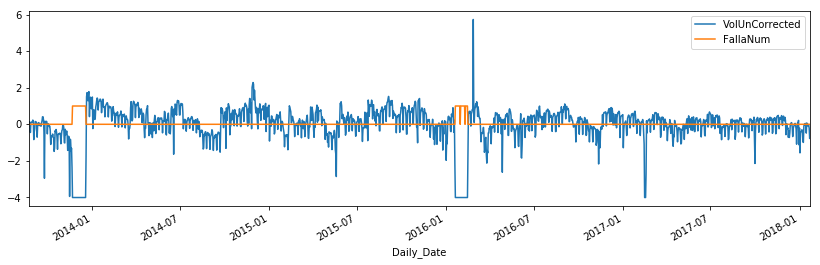

In [40]:
datframe.set_index(keys='Daily_Date')[['VolUnCorrected','FallaNum']].plot(figsize = (14,4))

In [41]:
lista = []
for i in range(0,datframe.index.max()+1):
    if datframe.index.max()-9>i:
        lista.append(datframe['Falla'].iloc[i:i+10].any())
    else :
        lista.append(False)
datframe['Predictor']=lista

In [42]:
datframe['PredictorNum'] = datframe['Predictor'].map({True:1,False:0})

In [43]:
datframe

VolUnCorrected  VolCorrected  Pressure  Temperature          Daily_Date  \
0           0.013127      0.034789  0.124173    -0.250344 2013-08-22 23:59:59   
1           0.139166      0.153843  0.063584    -0.250344 2013-08-23 23:59:59   
2           0.063699      0.093188  0.124173    -0.250344 2013-08-24 23:59:59   
3          -0.448111     -0.345312  0.487702    -0.250344 2013-08-25 23:59:59   
4           0.153788      0.150133  0.002996    -0.250344 2013-09-04 23:59:59   
...              ...           ...       ...          ...                 ...   
1607       -0.053834      0.005739  0.218084    -0.479296 2018-01-19 23:59:59   
1608       -0.096589     -0.027951  0.255043    -0.484384 2018-01-18 23:59:59   
1609       -0.205094     -0.126181  0.307755    -0.499647 2018-01-20 23:59:59   
1610       -0.777421     -0.662011  0.573738    -0.535262 2018-01-21 23:59:59   
1611       -0.330119     -0.261851 -6.790768    -7.246090 2018-01-22 23:59:59   

      Mayor_2std  Consecutivo  Falla  FallaNum  Predictor  PredictorNum  
0          False        False  False         0      False             0  
1          False        False  False         0      False             0  
2          False        False  False         0      False             0  
3          False        False  False         0      False             0  
4          False        False  False         0      False             0  
...          ...          ...    ...       ...        ...           ...  
1607       False        False  False         0      False             0  
1608       False        False  False         0      False             0  
1609       False        False  False         0      False             0  
1610       False        False  False         0      False             0  
1611       False        False  False         0      False             0  

[1612 rows x 11 columns]

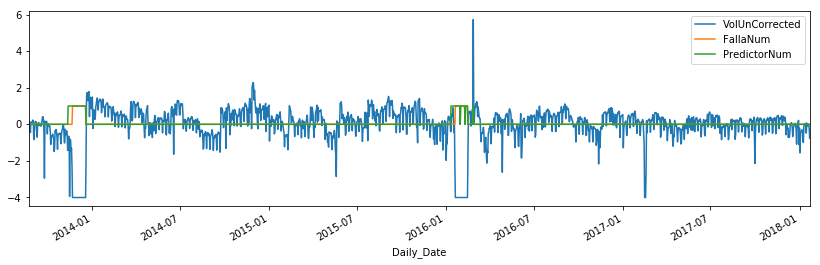

In [44]:
datframe.set_index(keys='Daily_Date')[['VolUnCorrected','FallaNum','PredictorNum']].plot(figsize = (14,4))

In [45]:
datframe['SoloAntes']=(datframe['Falla'] ^ datframe['Predictor'])

In [46]:
datframe['SoloAntesNum'] = datframe['SoloAntes'].map({True:1,False:0})

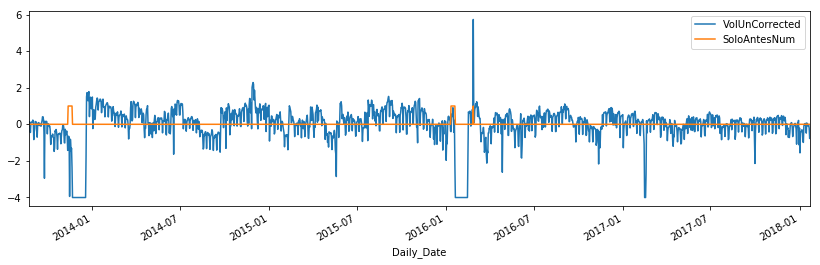

In [48]:
datframe.set_index(keys='Daily_Date')[['VolUnCorrected','SoloAntesNum']].plot(figsize = (14,4))

In [49]:
# tomar todos los sientemas como si fuera uno 